# Plotting of Nanopore BAM Files 

### Bam files used 
1. 
 ID: **FAB23716**   
 Centre: UBC    
 SampleType: DNA      
 Kit: Rapid    
 Pore: R9
 
2. ID: **FAB39088**   
 Centre: Notts   
 SampleType: DNA   
 Kit: Ligation   
 Pore: R9.4
 
3. ID: **FAF01169**   
 Centre: Bham   
 SampleType: Cells   
 Kit: Ligation    
 Pore: R9.4
 
4. ID: **FAB49908**
 Centre: Bham   
 SampleType: Cells   
 Kit: Rapid    
 Pore: R9.4

In [2]:
import pysam
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

In [65]:
"""
Madeline Hawkins

TODO: Modify getStats to take in which chromosome we are interested in. 

BAM Class 
Functions for grabbing the Coverage, Frequency of Indels and Mismatches

Input: AlignmentFile Object of the bam file 
"""

class BAM: 
    def __init__(self, bamFile):
        self.myBAM = bamFile 
        
    def getStats(self):
        coverage = []
        mapping_quality = []
        indel = []
        chromosome = 'chr1'
        for pileup_col in self.myBAM.pileup(chromosome):
            tot_segments = pileup_col.nsegments
            for pileup_read in pileup_col.pileups:
                # Insertion
                if pileup_read.indel > 0:
                    indel.append(1)
                # Deletion 
                elif pileup_read.indel < 0: 
                    indel.append(2)
                # Not an indel 
                else: 
                    indel.append(0)
                if pileup_read.is_del or pileup_read.is_refskip or pileup_read.alignment.is_secondary: 
                    tot_segments = tot_segments - 1
                    mapping_quality.append(pileup_read.alignment.mapping_quality)
            #Ignoring telemeres 
            if tot_segments < 200: 
                coverage.append(tot_segments)
        return coverage, mapping_quality, indel
        
        
bamFile = pysam.AlignmentFile('chr1/chr1.bam', 'rb')

newBam = BAM(bamFile)
coverage, mapping_quality, indel = newBam.getStats()

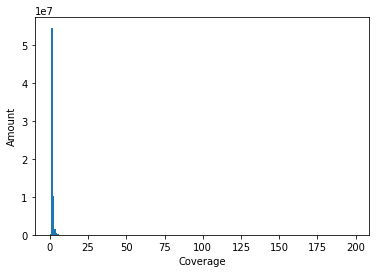

In [49]:
var = 'Chromosome Position'
plt.hist(coverage, bins=200)
plt.xlabel('Coverage')
plt.ylabel('Amount')

plt.show()

This shows that the coverage is mostly one but let's zoom in more on the others to see the rest of the coverage. 

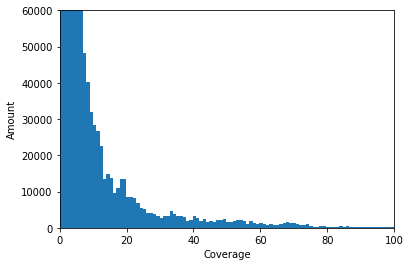

In [50]:
plt.hist(coverage, bins=200)
plt.xlabel('Coverage')
plt.ylabel('Amount')
plt.axis([0, 100, 0, 60000])

plt.show()

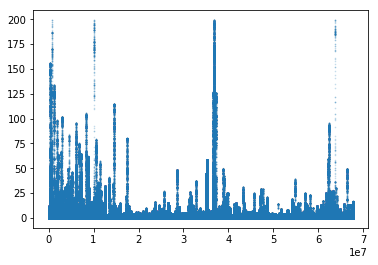

In [63]:
"""
Coverage based on position
"""
x = range(0, len(coverage))
y = coverage
plt.xlabel('Position')
plt.ylabel('Coverage')
plt.scatter(x, y, 0.5, alpha=0.2)
plt.show()

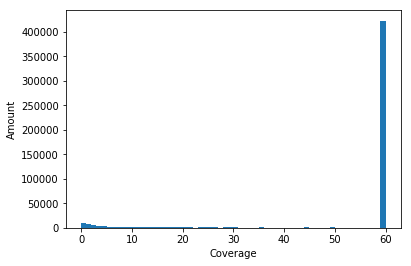

In [52]:
plt.hist(mapping_quality, bins=60)
plt.xlabel('Mapping Quality')
plt.ylabel('Amount')
plt.show()


Like in coverage, mapping quality is mostly 60 but lets zoom in on the others and see what we see. 

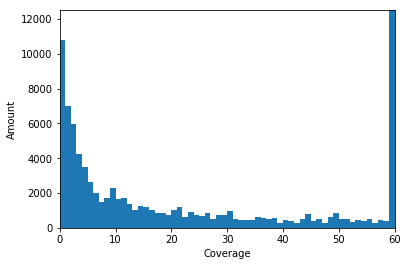

In [62]:
plt.hist(mapping_quality, bins=60)
plt.xlabel('Mapping Quality')
plt.ylabel('Amount')
plt.axis([0, 60, 0, 12500])
plt.show()

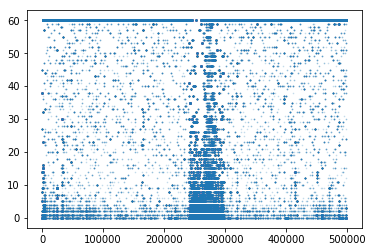

In [55]:
"""
Mapping Quality based on position 

Why does the mapping quality dip in the middle hmmmmm. 
"""
x = range(0, len(mapping_quality))
y = mapping_quality
plt.xlabel('Position')
plt.ylabel('Mapping Quality')
plt.scatter(x, y, 0.5, alpha=0.2)
plt.show()

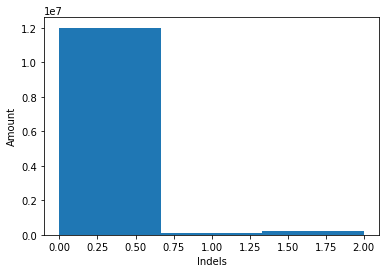

In [69]:
"""
Mostly matching
"""
plt.hist(indel, bins=3)
plt.xlabel('Indels')
plt.ylabel('Amount')
plt.show()

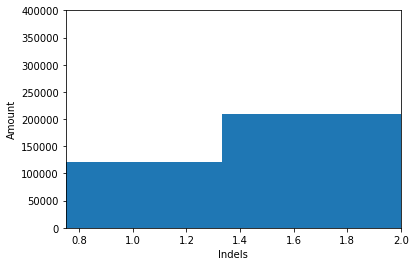

In [81]:
"""
Zooming in on the indels 
"""
plt.hist(indel, bins=3)
plt.xlabel('Indels')
plt.ylabel('Amount')
plt.axis([0.75, 2, 0, 400000])
plt.show()